# Bayesian Linear Regression with PyMC3

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import arviz as az

np.random.seed(1)
plt.style.use('ggplot')

## Generate Synthetic Data

In [3]:
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)
x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

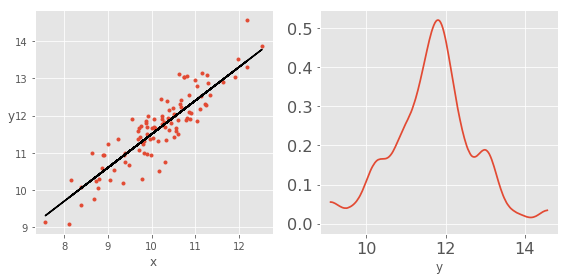

In [10]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

## Fit the model

In [11]:
import pymc3 as pm

In [12]:
with pm.Model() as model_g:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = pm.Deterministic('mu', alpha + x * beta)
    y_hat = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    trace_g = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta, alpha]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:18<00:00, 184.41draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123b558d0>,
      dtype=object)

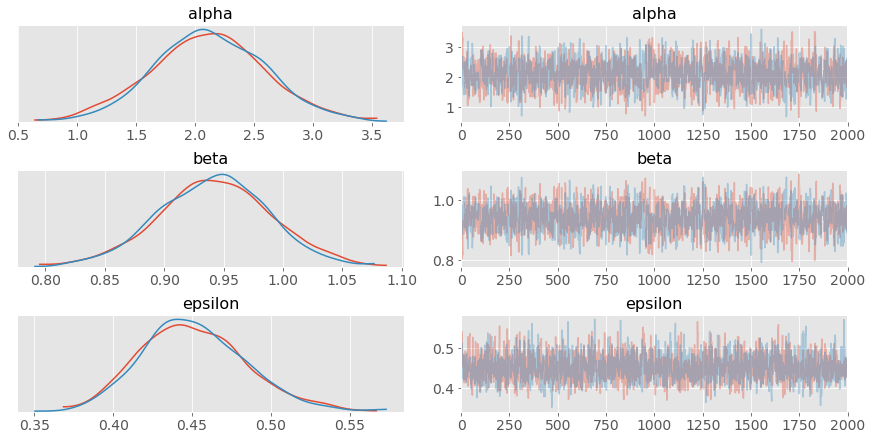

In [13]:
az.plot_trace(trace_g, var_names=['alpha', 'beta', 'epsilon'])

## High Autocorrelation in Linear Models

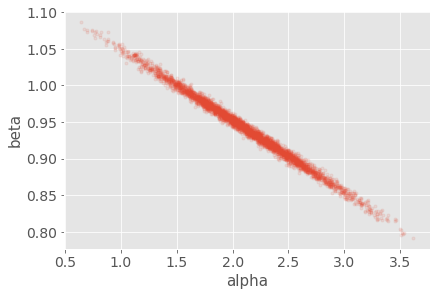

In [14]:
az.plot_pair(trace_g, var_names=['alpha', 'beta'], plot_kwargs={'alpha' : 0.1})